In [5]:
import pandas as pd
exams_results = pd.read_csv('exams.csv')
exams_results.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [6]:
from sklearn.model_selection import train_test_split 
from numpy import random

SEED = 12465
random.seed(SEED)
exams_values = exams_results.drop(columns=['id', 'diagnostico'])
diagnostic = exams_results.diagnostico

train_x, test_x, train_y, test_y = train_test_split(exams_values, diagnostic)

In [7]:
train_y.head()

365    M
148    B
463    B
121    M
99     M
Name: diagnostico, dtype: object

In [8]:
exams_results.isnull().sum


<bound method NDFrame._add_numeric_operations.<locals>.sum of         id  diagnostico  exame_1  exame_2  exame_3  exame_4  exame_5  exame_6  \
0    False        False    False    False    False    False    False    False   
1    False        False    False    False    False    False    False    False   
2    False        False    False    False    False    False    False    False   
3    False        False    False    False    False    False    False    False   
4    False        False    False    False    False    False    False    False   
..     ...          ...      ...      ...      ...      ...      ...      ...   
564  False        False    False    False    False    False    False    False   
565  False        False    False    False    False    False    False    False   
566  False        False    False    False    False    False    False    False   
567  False        False    False    False    False    False    False    False   
568  False        False    False    False    Fa

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = exams_results.drop(columns=["id", "diagnostico"])
diagnostic = exams_results.diagnostico
dt_exams_v1 = valores_exames.drop(columns="exame_33")
train_x, test_x, train_y, test_y = train_test_split(dt_exams_v1, 
                                                        diagnostic, test_size=0.3)

classificador = RandomForestClassifier(n_estimators = 10)
classificador.fit(train_x, train_y)
print("The Classification Result is: %.2f%%" % (classificador.score(test_x, test_y)* 100))

The Classification Result is: 94.15%


In [10]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)


dClassifier = DummyClassifier(strategy='most_frequent')
dClassifier.fit(train_x, train_y)

print("The Dummy Classification Result is: %.2f%%" % (classificador.score(test_x, test_y)* 100))




The Dummy Classification Result is: 94.15%


In [11]:
dados_plot = pd.concat([diagnostic, dt_exams_v1.iloc[:,0:10]], axis=1)
dados_plot.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809


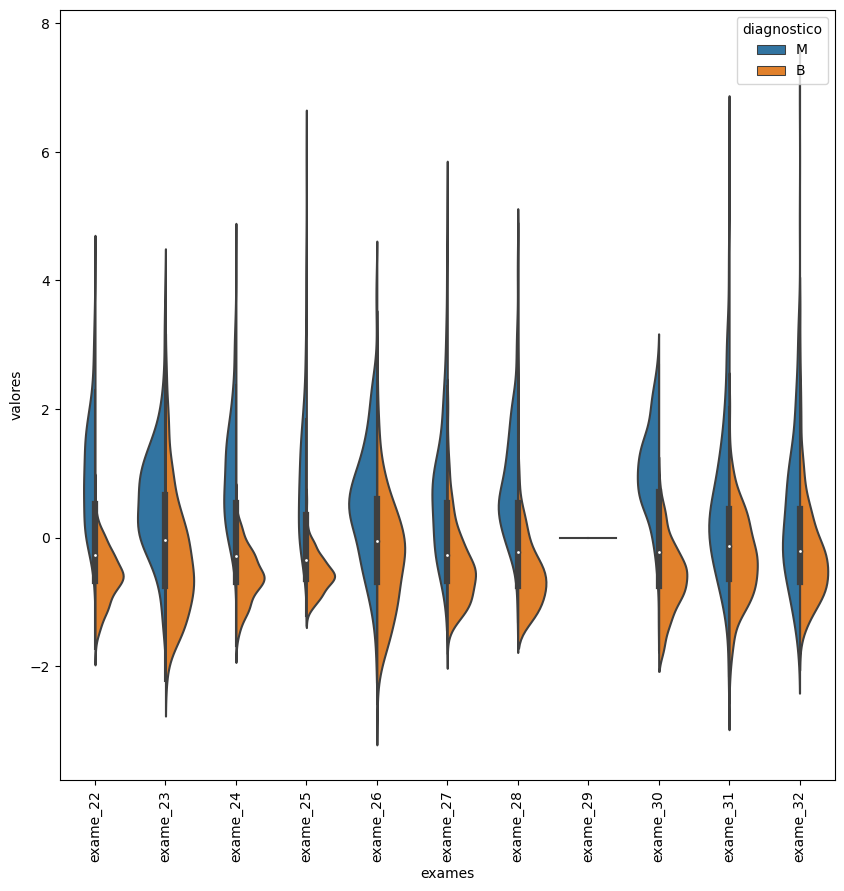

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizar = StandardScaler()
padronizar.fit(dt_exams_v1)

dt_exams_v2 = padronizar.transform(dt_exams_v1)
dt_exams_v2 = pd.DataFrame(data= dt_exams_v2, columns=dt_exams_v1.keys())
plotar_grafico_violino(dt_exams_v2, 21, 32)

In [13]:
def plotar_grafico_violino(v_exam, init, end):
    dados_plot = pd.concat([diagnostic, v_exam.iloc[:,init:end]], axis=1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")
    plt.figure(figsize=(10, 10))
    sns.violinplot(x="exames", y="valores", hue="diagnostico", data=dados_plot, split=True)
    plt.xticks(rotation=90)

In [15]:
exams_values_v3 = dt_exams_v2.drop(columns=["exame_29", "exame_4"])

def classification(values):
    SEED = 123
    random.seed(SEED)
    train_x, test_x, train_y, test_y = train_test_split(values, 
                                                        diagnostic, test_size=0.3)
    classificador = RandomForestClassifier(n_estimators = 10)
    classificador.fit(train_x, train_y)
    print("The Classification Result is: %.2f%%" % (classificador.score(test_x, test_y)* 100))
    
classification(exams_values_v3)

The Classification Result is: 97.08%


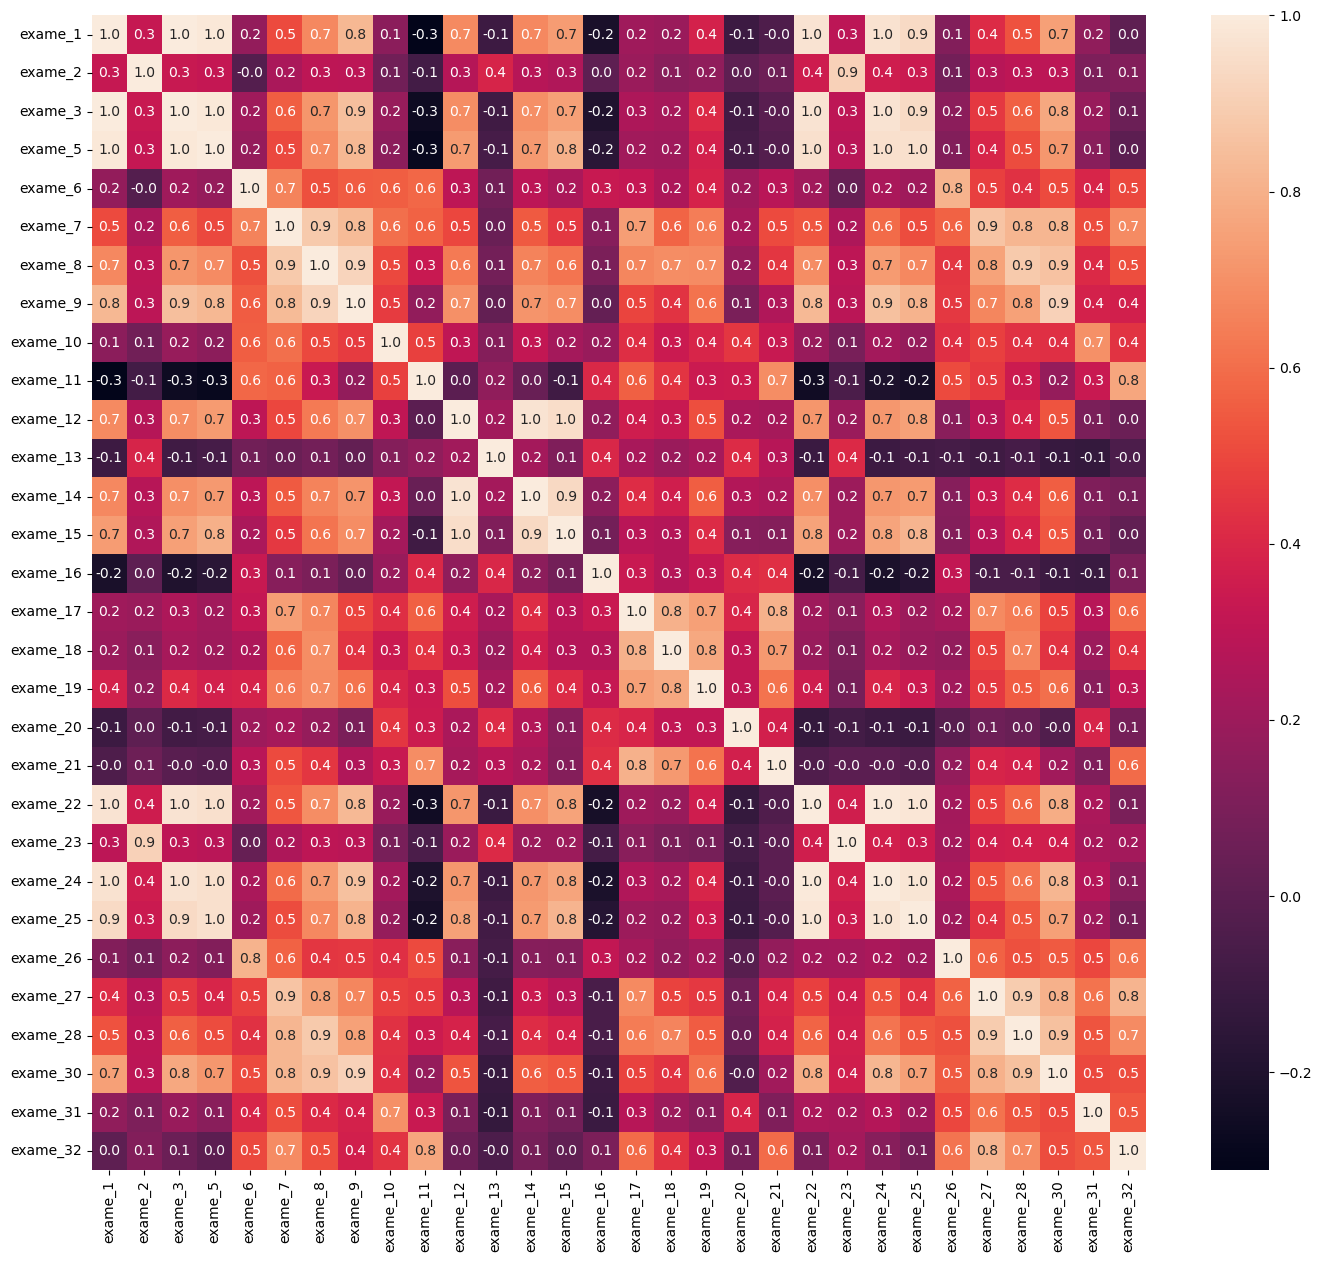

In [17]:
correlation_matrix = exams_values_v3.corr()
plt.figure(figsize=(17, 15))

sns.heatmap(correlation_matrix, annot=True, fmt=".1f" )
correlation_matrix_v2 = correlation_matrix[correlation_matrix>0.99]


In [18]:
correlation_matrix_v3 = correlation_matrix_v2.sum()

In [19]:
correlation_variables = correlation_matrix_v3[correlation_matrix_v3>1]
correlation_variables

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [20]:
exams_values_v4 = exams_values_v3.drop(columns=correlation_variables.keys())

In [21]:
exams_values_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [22]:
classification(exams_values_v4)

The Classification Result is: 97.66%


In [24]:
exams_values_v5 = exams_values_v3.drop(columns=["exame_3", "exame_24"])
classification(exams_values_v5)

The Classification Result is: 97.66%


In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


select_from_k_best = SelectKBest(chi2, k=7)

In [29]:
select_from_k_best

SelectKBest(k=7, score_func=<function chi2 at 0x7fea845dee50>)

In [40]:
SEED = 1234
random.seed(seed=SEED)
exams_values_v6 = dt_exams_v1.drop(columns=(["exame_4", "exame_29", "exame_3", "exame_24"]))

train_x, test_x, train_y, test_y = train_test_split(exams_values_v6, 
                                                        diagnostic, test_size=0.3)

select_from_k_best.fit(train_x, train_y)
train_select_from_k_best = select_from_k_best.transform(train_x)
test_select_from_k_best = select_from_k_best.transform(test_x)

In [37]:
train_select_from_k_best.shape

(398, 7)

In [43]:
SEED = 1234
classificador = RandomForestClassifier(n_estimators = 100, random_state=SEED)
classificador.fit(train_select_from_k_best, train_y)
print("The Classification Result is: %.2f%%" % (classificador.score(test_select_from_k_best, test_y)* 100))
    

The Classification Result is: 94.15%


In [58]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(test_y, classificador.predict(test_select_from_k_best))
confusion_matrix

array([[20, 85],
       [ 0, 66]])

[Text(0.5, 50.249999999999986, 'Predicted'), Text(87.25, 0.5, 'Real')]

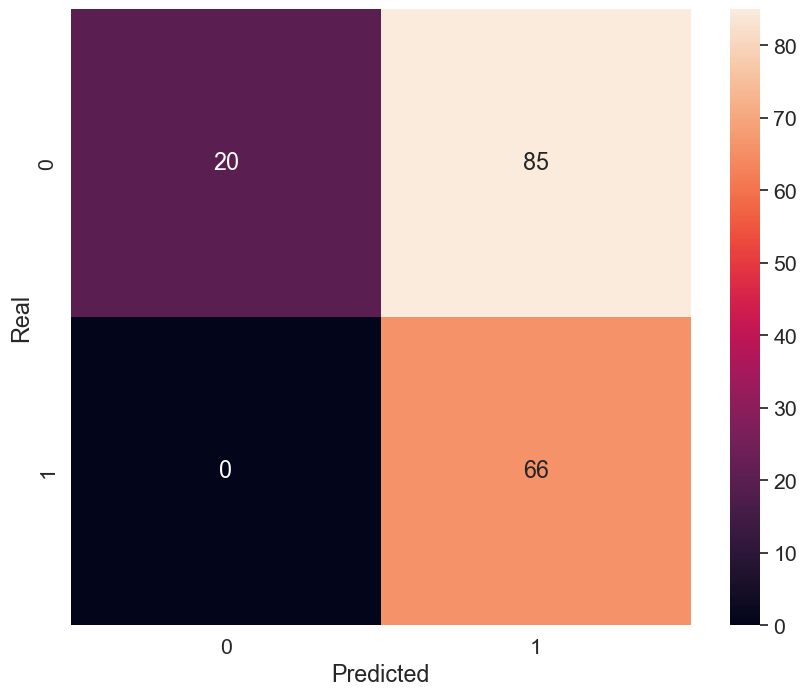

In [59]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix, annot=True, fmt="d" ).set(xlabel="Predicted", ylabel="Real")

In [83]:
from sklearn.feature_selection import RFECV



SEED = 1234
random.seed(seed=SEED)

train_x, test_x, train_y, test_y = train_test_split(exams_values_v6, 
                                                        diagnostic, test_size=0.3)



classificador = RandomForestClassifier(n_estimators = 100, random_state=SEED)
classificador.fit(train_x, train_y)

select_from_RFE = RFECV(estimator=classificador, cv=7, step=1, scoring='accuracy')

select_from_RFE.fit(train_x, train_y)
train_select_from_RFE = select_from_RFE.transform(train_x)
test_select_from_RFE = select_from_RFE.transform(test_x)

classificador.fit(train_select_from_RFE, train_y)



plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(select_from_RFE, annot=True, fmt="d" ).set(xlabel="Predicted", ylabel="Real")


print("The Classification Result is: %.2f%%" % (classificador.score(test_select_from_RFE, test_y)* 100))

ValueError: Must pass 2-d input. shape=()

<Figure size 1000x800 with 0 Axes>

In [69]:
train_x.columns[select_from_RFE.support_]

Index(['exame_8', 'exame_9', 'exame_15', 'exame_22', 'exame_25', 'exame_28',
       'exame_30'],
      dtype='object')

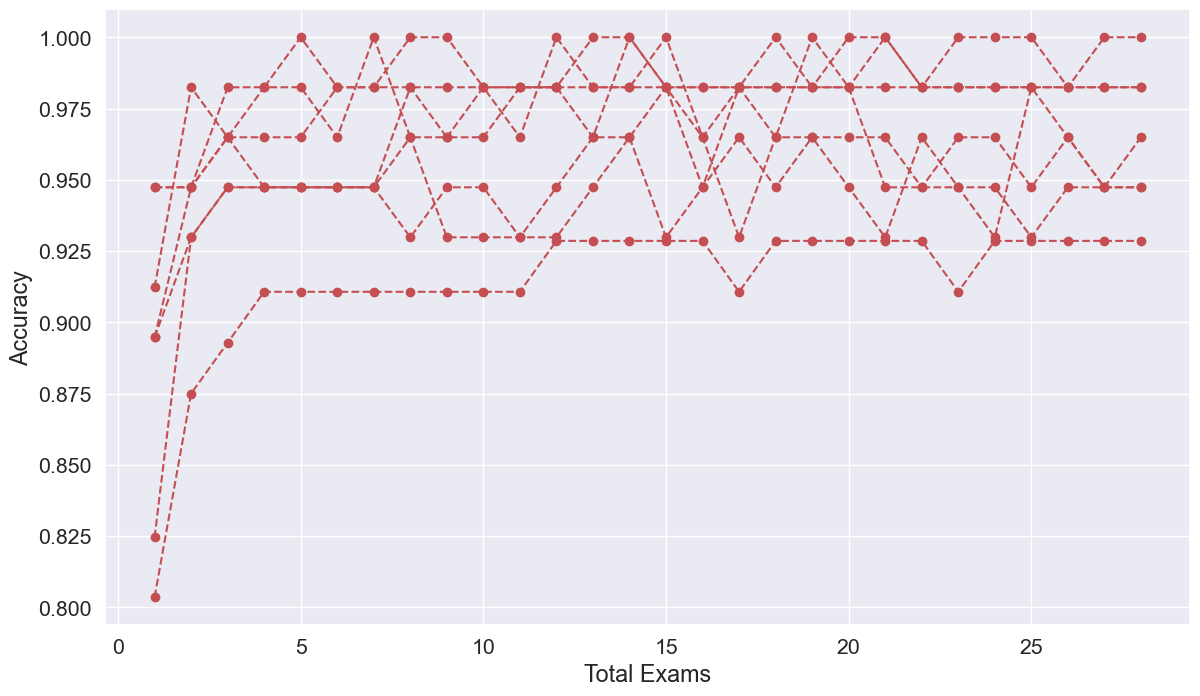

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("Total Exams")
plt.ylabel("Accuracy")
plt.plot(range(1, len(select_from_RFE.grid_scores_)+1), select_from_RFE.grid_scores_, marker='o', linestyle='--', color='r')
plt.show()

In [81]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(seed=SEED)

train_x, test_x, train_y, test_y = train_test_split(exams_values_v6, diagnostic, test_size=0.3)

classificador = RandomForestClassifier(n_estimators = 100, random_state=SEED)
classificador.fit(train_x, train_y)

select_rfe = RFE(estimator=classificador, n_features_to_select=2, step=1)
select_rfe.fit(train_x, train_y)
train_rfe = select_rfe.transform(train_x)
teste_rfe = select_rfe.transform(test_x)

In [82]:
exams_values_v7 = select_rfe.transform(exams_values_v6)


(569, 2)

<AxesSubplot:>

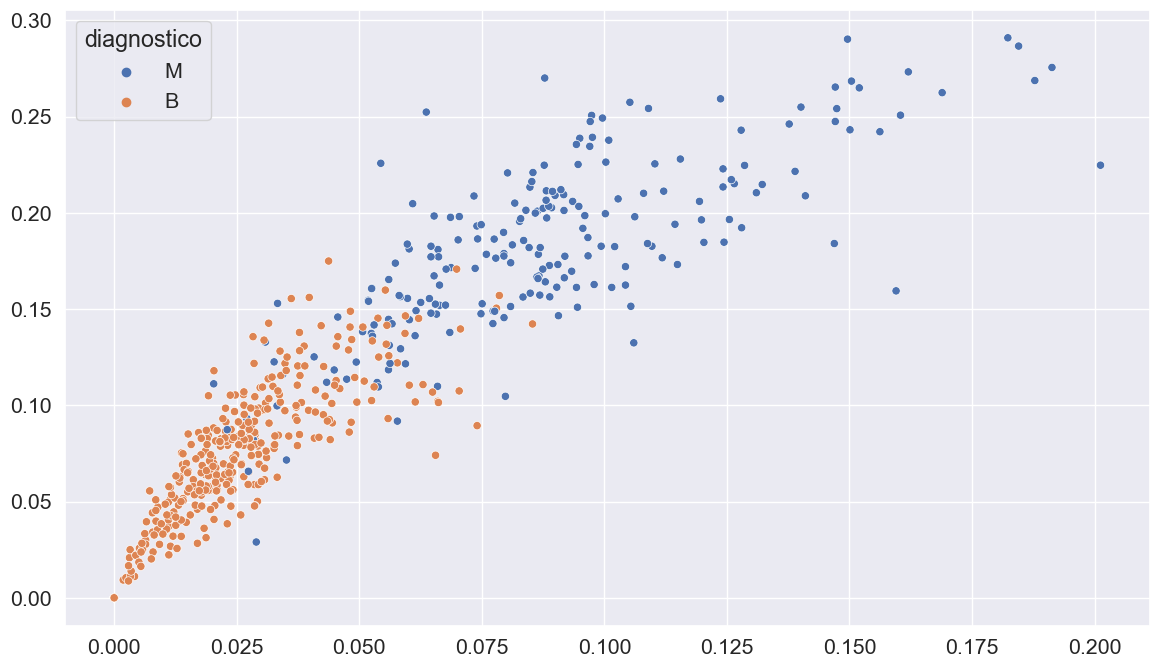

In [86]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.scatterplot(x = exams_values_v7[:,0], y = exams_values_v7[:,1], hue=diagnostic)

<AxesSubplot:>

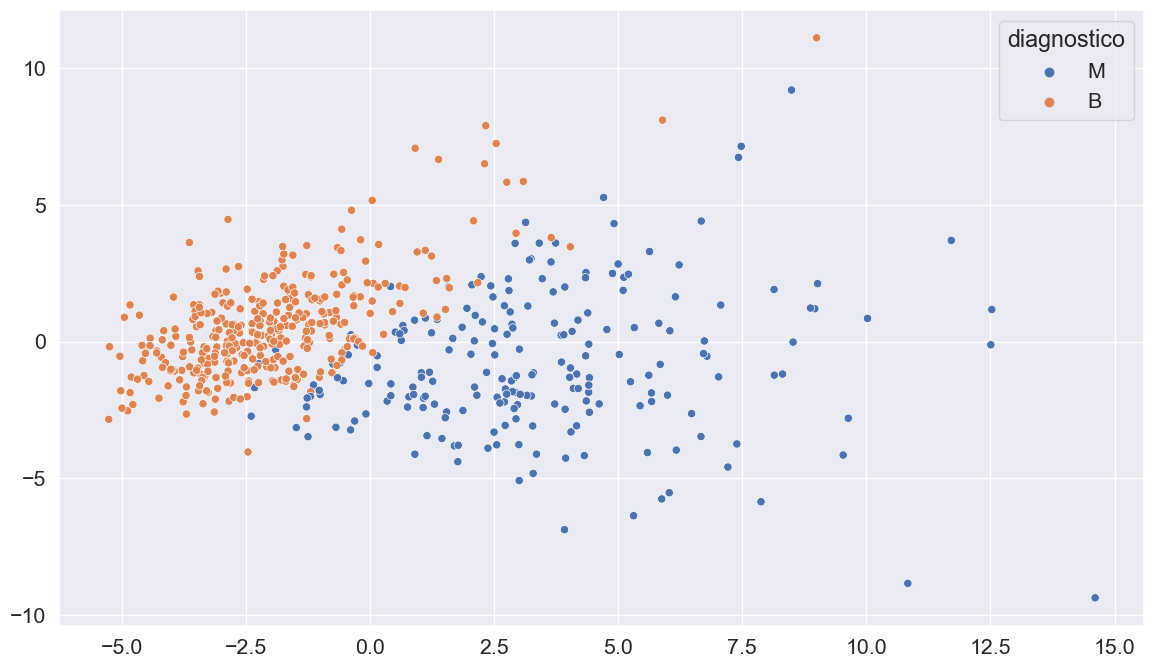

In [91]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
values_exams_v8 = pca.fit_transform(exams_values_v5)
plt.figure(figsize=(14, 8))
sns.scatterplot(x=values_exams_v8[:,0], y = values_exams_v8[:,1], hue=diagnostic)

In [94]:
exams_values_v5

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,...,0.167980,1.901185,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,...,-0.490556,1.536720,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,...,0.036727,0.561361,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,...,0.904057,1.961239,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


/Users/raphaeltorquato/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/raphaeltorquato/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:>

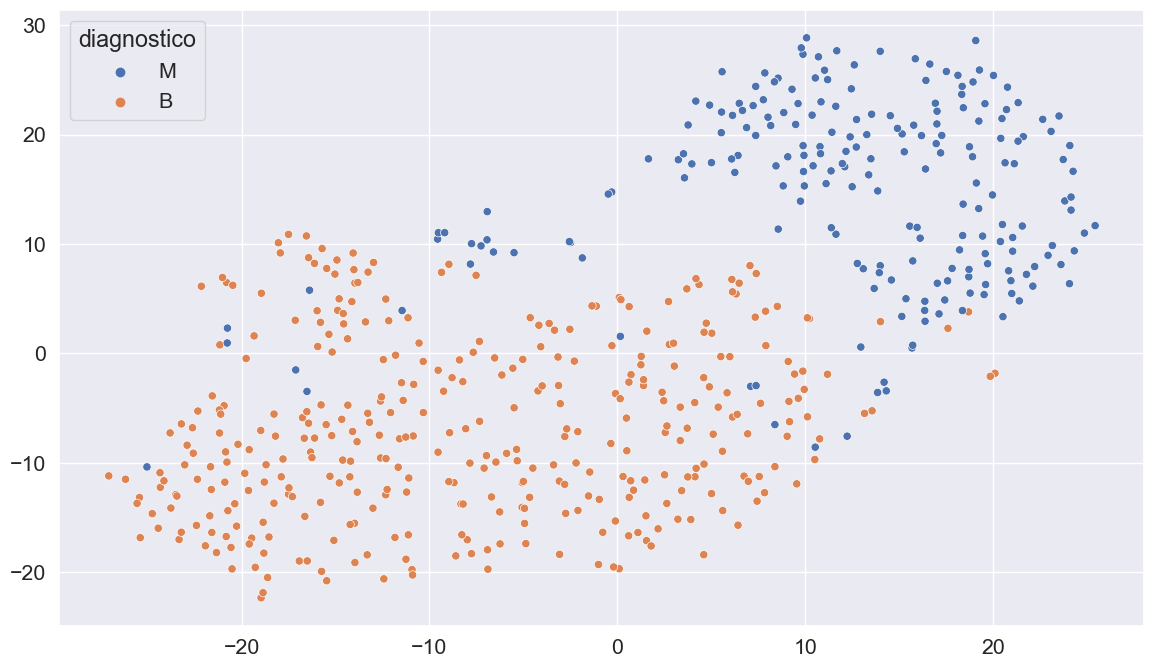

In [95]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
values_exams_v9 = tsne.fit_transform(exams_values_v5)
plt.figure(figsize=(14, 8))
sns.scatterplot(x=values_exams_v9[:,0], y = values_exams_v9[:,1], hue=diagnostic)